<a href="https://colab.research.google.com/github/Tookss55/DS/blob/main/U4/Amir_RegaU4proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install preliz

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import arviz as az
import pymc as pm
import preliz as pz

# UNIT 4 PROJECT

### Context and Data

For my Unit 4 project, I will be analzying the average song duration for 8 different genres, with both hierarchal and non hierarchal distributions. I want to see how these genres compare to one another. The genres and the ways I will refer to them in the code are:

1.   Rap
2.   Pop
3.   Rock
4.   Classical
5.   Jazz
6.   Country
7.   R&b
8.   Alternative

To represent these genres, I will take the three most critically acclaimed albums from one of the top artists of each genre. The artists and albums are:

1.   Drake - Take Care, Nothing Was The Same, IYRTITL
2.   Rihanna - Good Girl Gone Bad, Loud, Anti
3.   GNR - Appetite For Destruction, Use Your Illusions 1,UYI 2
4.   Chopin - Nocturnes, Ballades, Waltzs
5.   Brubeck - Time Out, Jazz at Oberlin, Dave Brubek Quartet at Carnegie Hall
6.   Johnny Cash - At Folsom Prison, At San Quintin, American IV
7.   Aaliyah - AANBAN, One In a Million, Aaliyah
8.   The Strokes - Is This It, Room on Fire, The New Abnormal

From the top three albums of each artist, I documented every song duration, and inputed it into the csv file below. I labeled the song duration with the genre number, and the album/song number.

In [ ]:
url_music_data = 'https://raw.githubusercontent.com/Tookss55/DS/refs/heads/main/Unit4/DSU4_PROJ_DATA%20-%20Sheet2.csv'

music_data = pd.read_csv(url_music_data, dtype = {'GENRE':'category'})

music_data

,GENRE,ALBUM/SONG,DURATION
0,1,1/1,272
1,1,1/2,224
2,1,1/3,235
3,1,1/4,208
4,1,1/5,277
...,...,...,...
307,8,3/5,375
308,8,3/6,310
309,8,3/7,275
310,8,3/8,337


(array([ 27., 108., 101.,  37.,  24.,   4.,   7.,   1.,   2.,   1.]),
 array([ 72. , 150.9, 229.8, 308.7, 387.6, 466.5, 545.4, 624.3, 703.2,
        782.1, 861. ]),
 <BarContainer object of 10 artists>)

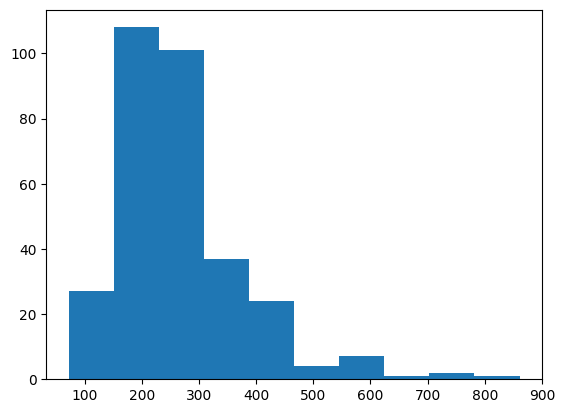

In [ ]:
plt.hist(music_data['DURATION'])

In [ ]:
print(music_data['DURATION'].mean())
print(music_data['DURATION'].median())

264.7692307692308
244.0


The histogram is a simple representation of my data, showing that majority of my the songs in my data is 200-300 seconds in duration, or about 3 1/2 to 5 minutes long. It also shows that there is a slight positive or right skew.

### NON HIERARCHICAL MODELS

Now that I've inputted my data set, I will make a non hierarchal model, which assumes independance between the genres, so I don't need to make any hyperpriors.

In [ ]:
GENRE_encode = pd.Categorical(music_data['GENRE'])
GENRE_index = GENRE_encode.codes
GENRE_coords = {"GENRE": GENRE_encode.categories}

print(GENRE_encode)
print(GENRE_index)
print(GENRE_coords)

['1', '1', '1', '1', '1', ..., '8', '8', '8', '8', '8']
Length: 312
Categories (8, object): ['1', '2', '3', '4', '5', '6', '7', '8']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
{'GENRE': Index(['1', '2', '3', '4', '5', '6', '7', '8'], dtype='object')}


In [ ]:
genre_idx = music_data.GENRE.cat.codes.values

genre_coords = {"GENRE": music_data.GENRE.cat.categories} #this will put the coords in a dict, so pymc can read them

In [ ]:
with pm.Model(coords = GENRE_coords) as music_model:

  # Priors
  μ = pm.Normal('μ', mu = 250, sigma = 100, dims = "GENRE")
  σ = pm.HalfCauchy('σ', beta = 50, dims = "GENRE")
  α = pm.Uniform('α', upper = 1, lower = 0.5, dims = "GENRE")
  β = pm.Uniform('β', upper = 30, lower = 1, dims = "GENRE")

  # Likelihood
  y = pm.SkewStudentT('y', mu = μ[genre_idx], sigma = σ[genre_idx],
                      a = α[genre_idx], b = β[genre_idx],
                      observed = music_data["DURATION"])

  idata_music = pm.sample()

In [ ]:
pm.sample_posterior_predictive(idata_music, model = music_model, extend_inferencedata=True)

(0.0, 1000.0)

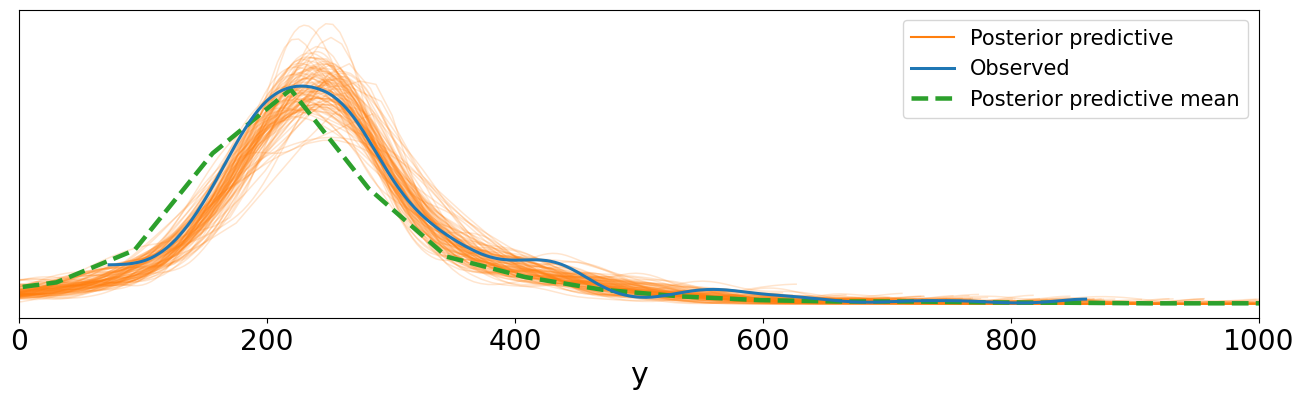

In [ ]:
ax = az.plot_ppc(idata_music, num_pp_samples=100, figsize=(16, 4), colors=["C1", "C0", "C2"])
ax.set_xlim(0, 1000)

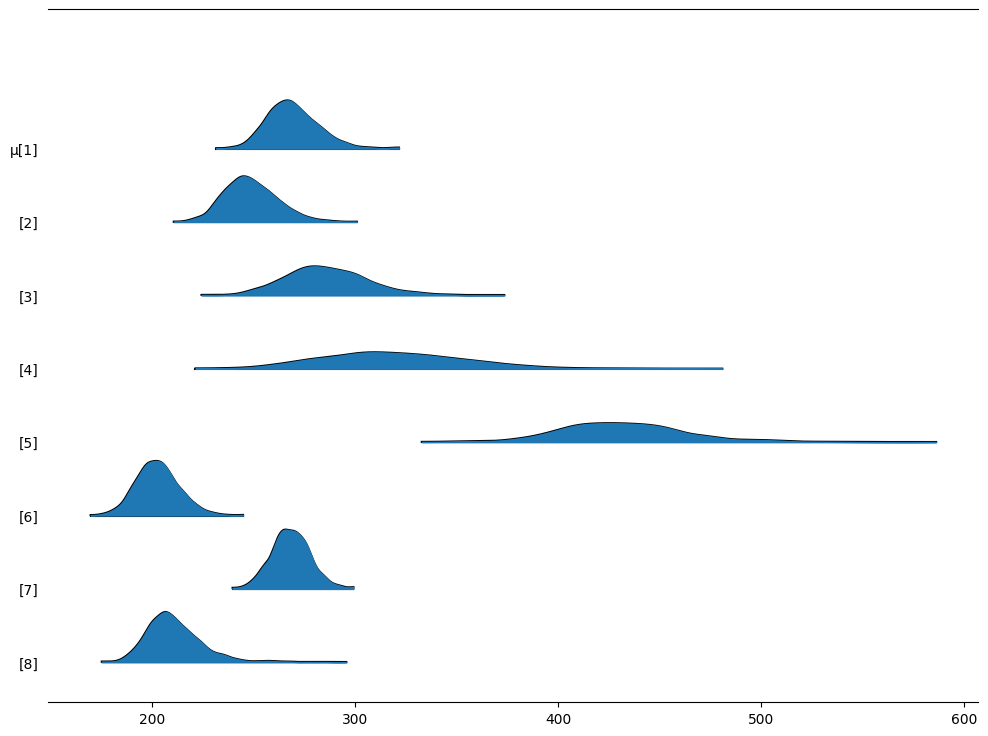

In [ ]:
axes = az.plot_forest(idata_music, kind="ridgeplot",
                      var_names='μ',
                      combined=True, figsize=(12, 9), hdi_prob=1)

I used a skewstudentT distribution for my non-hierarchal model and it worked pretty well. The posterior predictive mean is not very aligned though. I inorporated the slight skew that I saw in the histogram, and it looks like that worked well. Now, I will make some hierarchal models.


### HIERARCHAL MODELS

Hierarchal models have hyperpriors, and don't assume independence between genres, so hopefully I can make a more accurate model compared to my nonheirarchal model.

In [ ]:
with pm.Model(coords = GENRE_coords) as music_model_hierch:

  # Hyperpriors for the hierarchical model, got help from gemini
  alpha_mu = pm.HalfCauchy('alpha_mu', beta=1)
  beta_mu = pm.HalfCauchy('beta_mu', beta=1)
  alpha_nu = pm.HalfCauchy('alpha_nu', beta=1)
  beta_nu = pm.HalfCauchy('beta_nu', beta=1)

  # Genre-specific parameters for the Gamma distribution
  μ = pm.Gamma('μ', alpha_mu, beta_mu, dims = "GENRE")
  ν = pm.Gamma('ν', alpha_nu, beta_nu, dims = "GENRE")

  # Likelihood (using Gamma distribution for song durations)
  duration_obs = pm.Gamma('duration_obs',
                          mu = μ[genre_idx],
                          sigma = ν[genre_idx],
                          observed = music_data['DURATION'].values)

  idata_music_hierch = pm.sample(target_accept = 0.95)

In [ ]:
pm.sample_posterior_predictive(idata_music_hierch, model = music_model_hierch, extend_inferencedata=True)

(0.0, 1000.0)

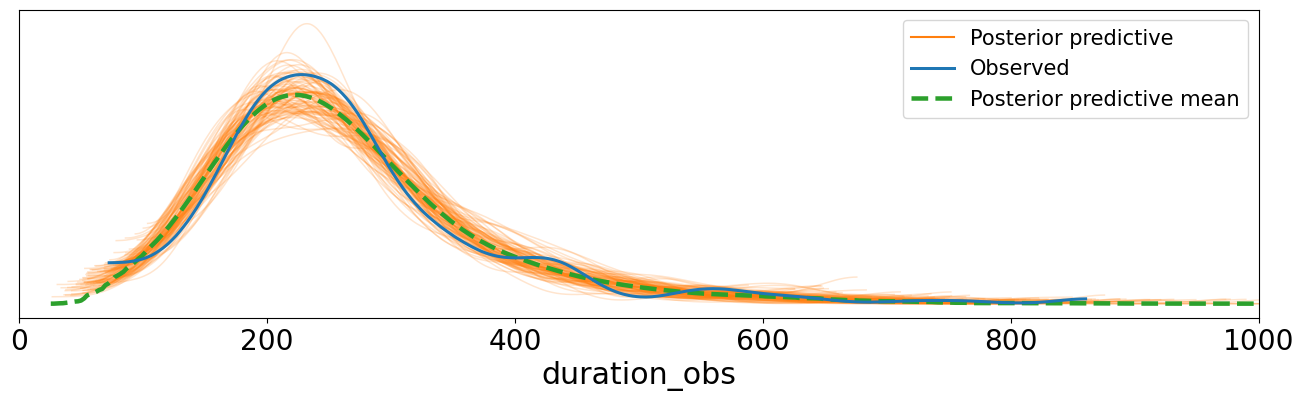

In [ ]:
ax = az.plot_ppc(idata_music_hierch, num_pp_samples=100, figsize=(16, 4), colors=["C1", "C0", "C2"])
ax.set_xlim(0, 1000)

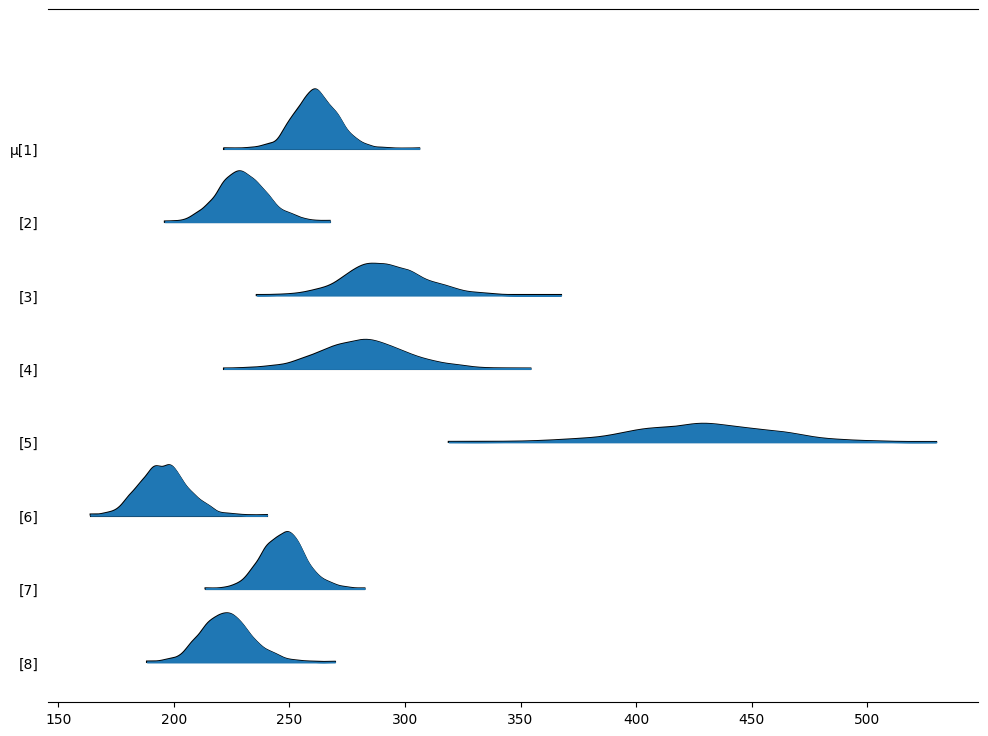

In [ ]:
axes = az.plot_forest(idata_music_hierch, kind="ridgeplot",
                      var_names='μ',
                      combined=True, figsize=(12, 9), hdi_prob=1)

In [ ]:
az.plot_trace(idata_music_hierch)
az.rhat(idata_music_hierch)

I used a gamma distribution for my fist model, mostly because I know it can't go below 0, which is applicable to my data. It doesn't account for skew, so it's definitely not going to be the best model, but it's a pretty good starting place. We see that Jazz music, group 5, has a much larger mean and much more variance than the other genres. This is pretty predictable considering Jazz music is much less structured than other music genres.

## Second hierarchal model


In [ ]:
with pm.Model(coords = genre_coords) as music_model_hierch_2:

  # Hyperpriors
  μ_mu = pm.Normal('μ_mu', mu = 0, sigma = 5)
  σ_mu = pm.HalfNormal('σ_mu', sigma = 3)
  ν_mu = pm.Exponential('ν_mu', lam = 0.5)

  # Priors
  μ = pm.StudentT('μ', mu = μ_mu, sigma = σ_mu, nu = ν_mu, dims = "GENRE")
  σ = pm.HalfNormal('σ', sigma = 10, dims = "GENRE")
  ν = pm.Exponential('ν', lam = 0.5, dims = "GENRE")

  # Likelihood
  y = pm.StudentT('y', mu = μ[genre_idx], sigma = σ[genre_idx], nu = ν[genre_idx],
                  observed = music_data["DURATION"])

  idata_music_hierch_2 = pm.sample()


In [ ]:
pm.sample_posterior_predictive(idata_music_hierch_2, model = music_model_hierch_2, extend_inferencedata=True)

(0.0, 1000.0)

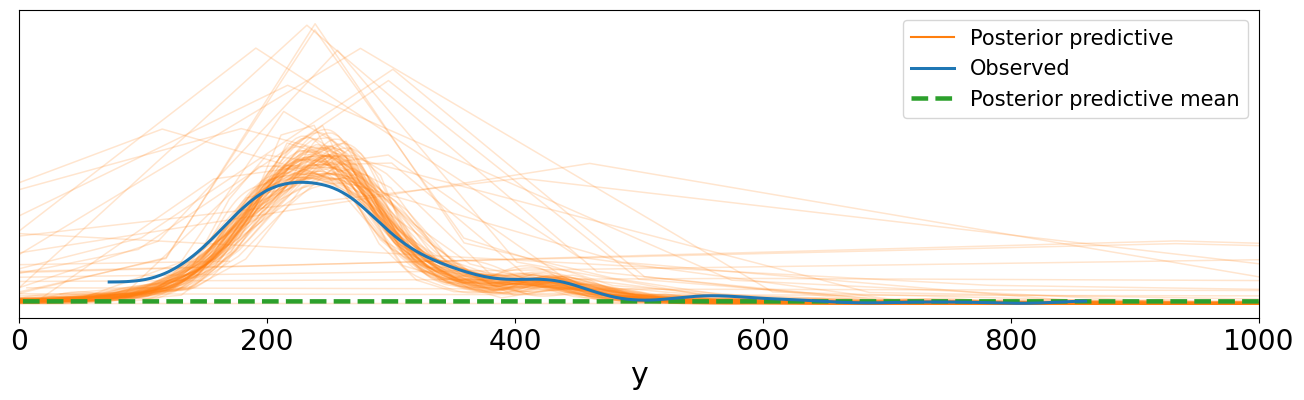

In [ ]:
ax = az.plot_ppc(idata_music_hierch_2, num_pp_samples=100, figsize=(16, 4), colors=["C1", "C0", "C2"])
ax.set_xlim(0, 1000)

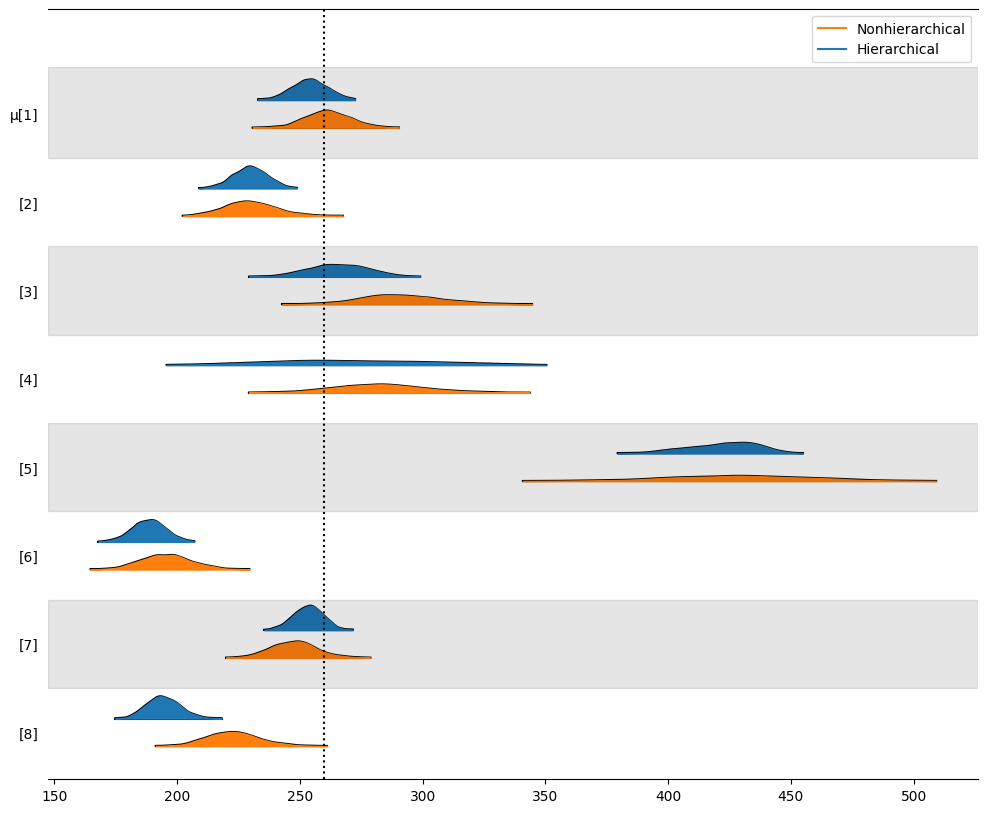

In [ ]:
axes = az.plot_forest([idata_music_hierch_2, idata_music], kind="ridgeplot",
                      model_names=['Hierarchical', 'Nonhierarchical'],
                      var_names='μ', combined=True, figsize=(12, 10),hdi_prob=0.997)

y_lims = axes[0].get_ylim()
axes[0].vlines(idata_music_hierch_2.posterior['μ'].mean(), *y_lims, color="k", ls=":");

<xarray.Dataset> Size: 248B
Dimensions:  (GENRE: 8)
Coordinates:
  * GENRE    (GENRE) <U1 32B '1' '2' '3' '4' '5' '6' '7' '8'
Data variables:
    μ        (GENRE) float64 64B 1.001 1.001 1.004 0.9995 ... 1.004 1.002 0.9997
    μ_mu     float64 8B 1.0
    ν        (GENRE) float64 64B 1.005 1.004 0.9994 1.002 1.001 1.003 1.001 1.0
    ν_mu     float64 8B 1.001
    σ        (GENRE) float64 64B 1.001 1.001 1.0 1.001 1.0 1.003 1.001 1.0
    σ_mu     float64 8B 1.001

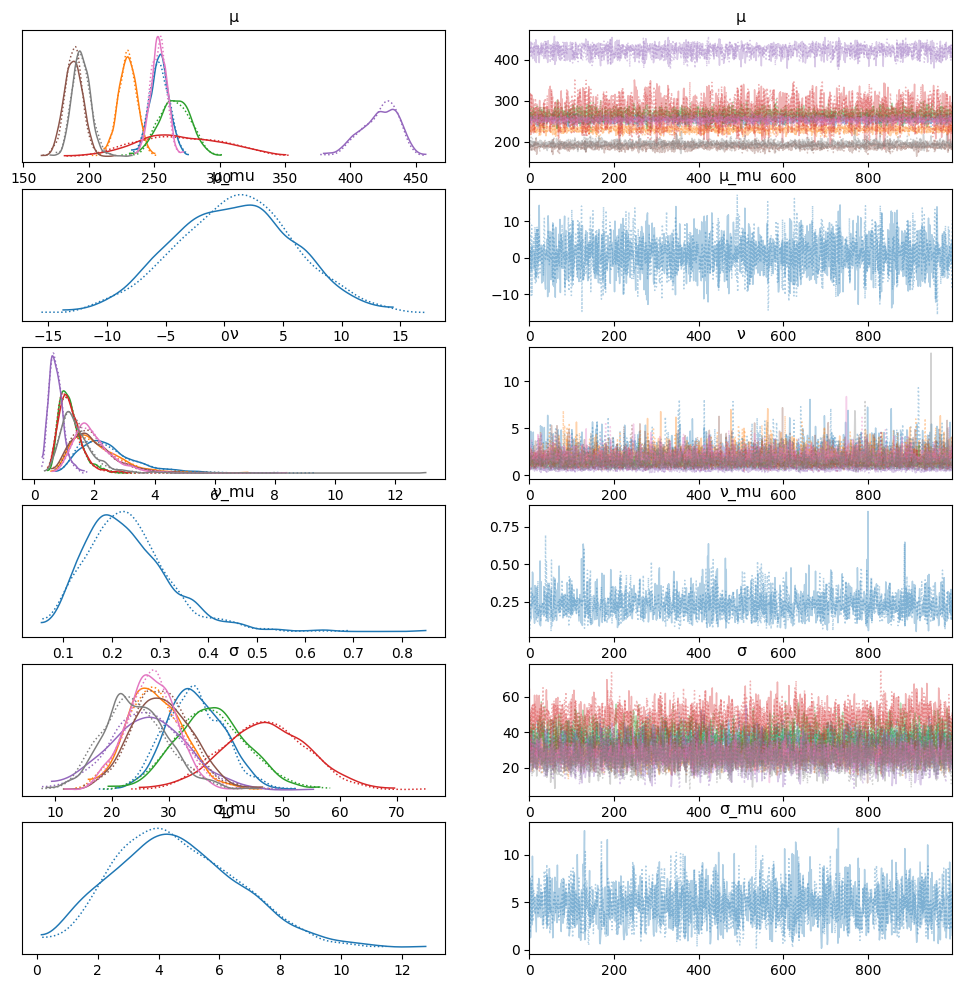

In [ ]:
az.plot_trace(idata_music_hierch_2)
az.rhat(idata_music_hierch_2)

Unfortunately, this model is actually a little bit worse than my first hierarchal model. I'm not really sure why, but for my next hierarchal model I will try to incorporate skew. Hopefully that fixes the problem.

In [ ]:
with pm.Model(coords = GENRE_coords) as music_model_hierch_3:

  # Hyperpriors
  μ_mu = pm.Normal('μ_mu', mu = 0, sigma = 10)
  σ_mu = pm.HalfCauchy('σ_mu', beta = 10)
  α_mu = pm.Uniform('α_mu', upper = 1, lower = 0.5)
  β_mu = pm.Uniform('β_mu', upper = 2, lower = 1)

  σ_sigma = pm.HalfCauchy('σ_sigma', beta = 8)

  # Priors
  μ = pm.SkewStudentT('μ', mu = μ_mu, sigma = σ_mu, a = α_mu, b = β_mu, dims = "GENRE")
  σ = pm.HalfNormal('σ', sigma = σ_sigma, dims = "GENRE")


  # Likelihood
  y = pm.SkewStudentT('y', mu = μ[genre_idx], sigma = σ[genre_idx], a = α_mu, b = β_mu,
                  observed = music_data["DURATION"])

  idata_music_hierch_3 = pm.sample()

In [ ]:
pm.sample_posterior_predictive(idata_music_hierch_3, model = music_model_hierch_3, extend_inferencedata=True)

(0.0, 1000.0)

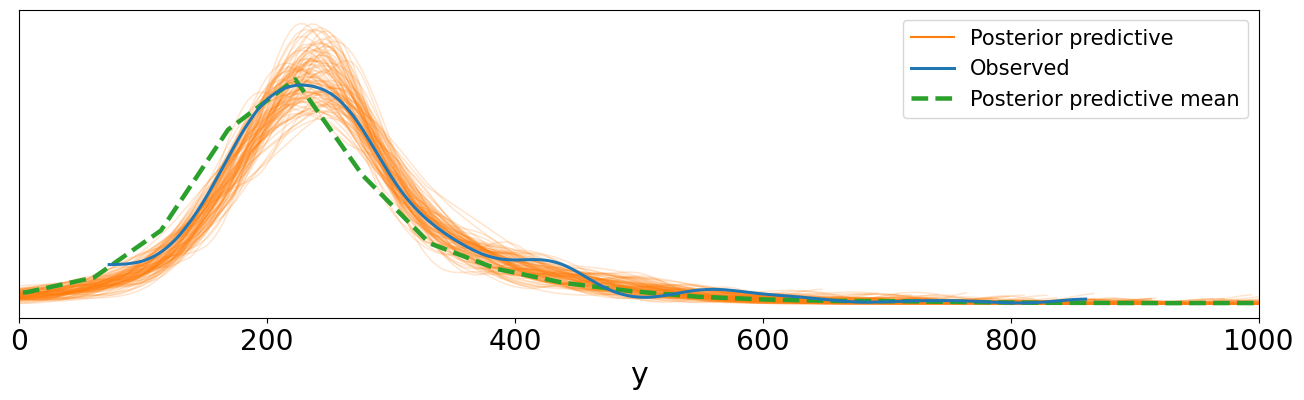

In [ ]:
ax = az.plot_ppc(idata_music_hierch_3, num_pp_samples=100, figsize=(16, 4), colors=["C1", "C0", "C2"])
ax.set_xlim(0, 1000)

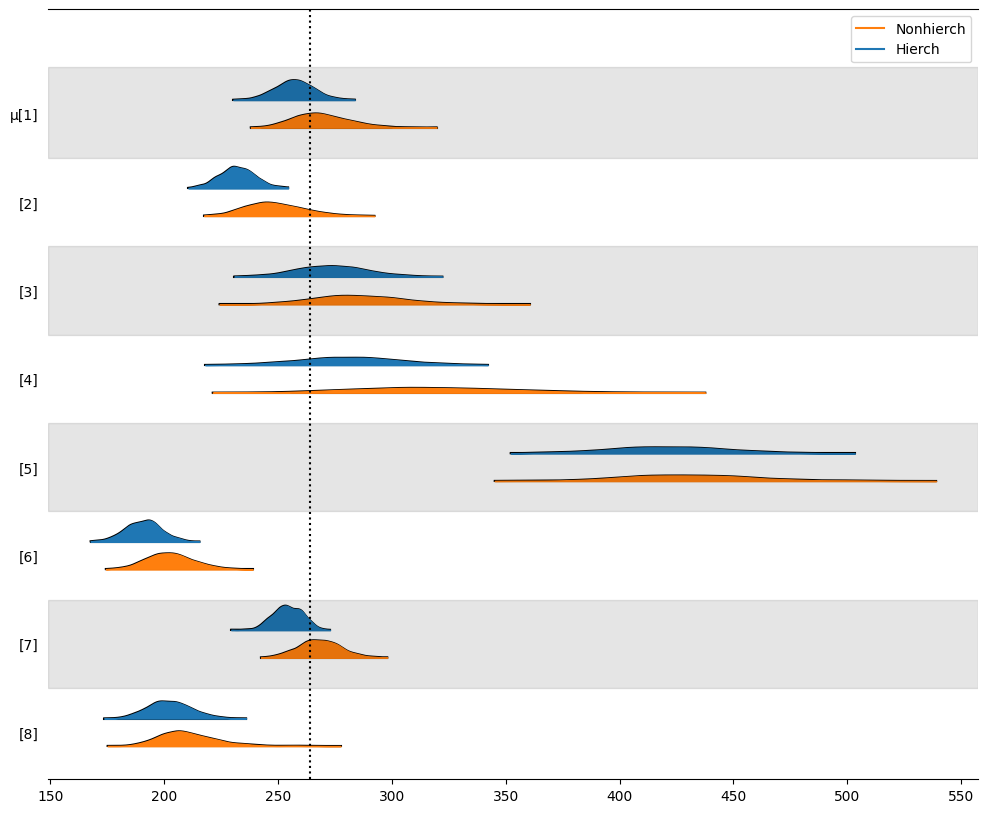

In [ ]:
axes = az.plot_forest([idata_music_hierch_3, idata_music], kind="ridgeplot",
                      model_names=['Hierch', 'Nonhierch'],
                      var_names='μ', combined=True, figsize=(12, 10),hdi_prob=0.997)

y_lims = axes[0].get_ylim()
axes[0].vlines(idata_music_hierch_3.posterior['μ'].mean(), *y_lims, color="k", ls=":");

<xarray.Dataset> Size: 200B
Dimensions:  (GENRE: 8)
Coordinates:
  * GENRE    (GENRE) <U1 32B '1' '2' '3' '4' '5' '6' '7' '8'
Data variables:
    α_mu     float64 8B 1.001
    β_mu     float64 8B 0.9996
    μ        (GENRE) float64 64B 1.001 1.0 1.002 1.005 1.0 1.002 1.005 1.001
    μ_mu     float64 8B 1.0
    σ        (GENRE) float64 64B 1.0 0.9996 1.001 1.001 0.9998 1.0 1.002 1.0
    σ_mu     float64 8B 1.002
    σ_sigma  float64 8B 1.002

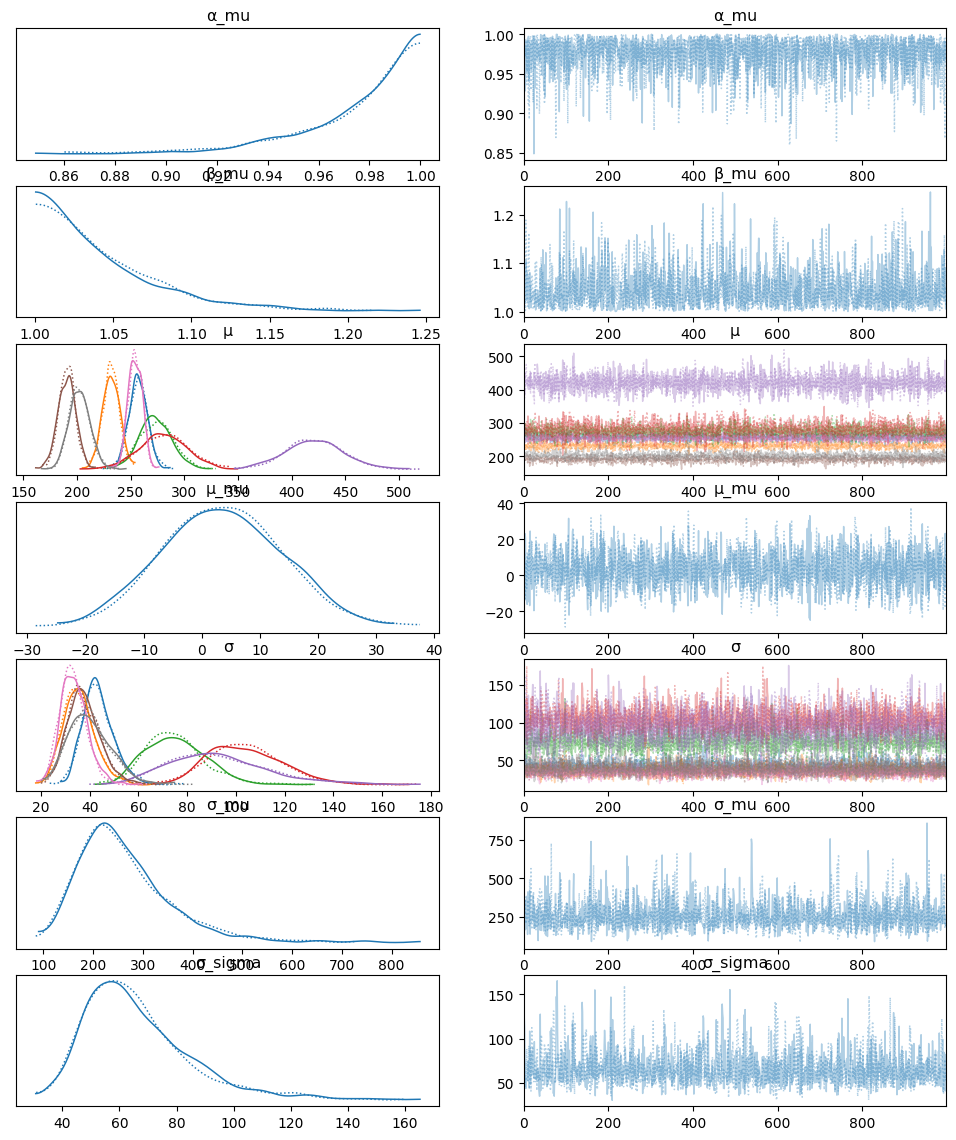

In [ ]:
az.plot_trace(idata_music_hierch_3)
az.rhat(idata_music_hierch_3)

After I included a SkewStudentT prior and likelihood, the distribution looks pretty decent. The posterior predictive mean is still pretty questionable, but the trace data and rhat graphs looks the best out of my hierarchal models.

### CONClUSION

Comparing my nonhierarchal model and best hierarchal model, we can see the mean, amongst other things. I'll plot this comparison again here:

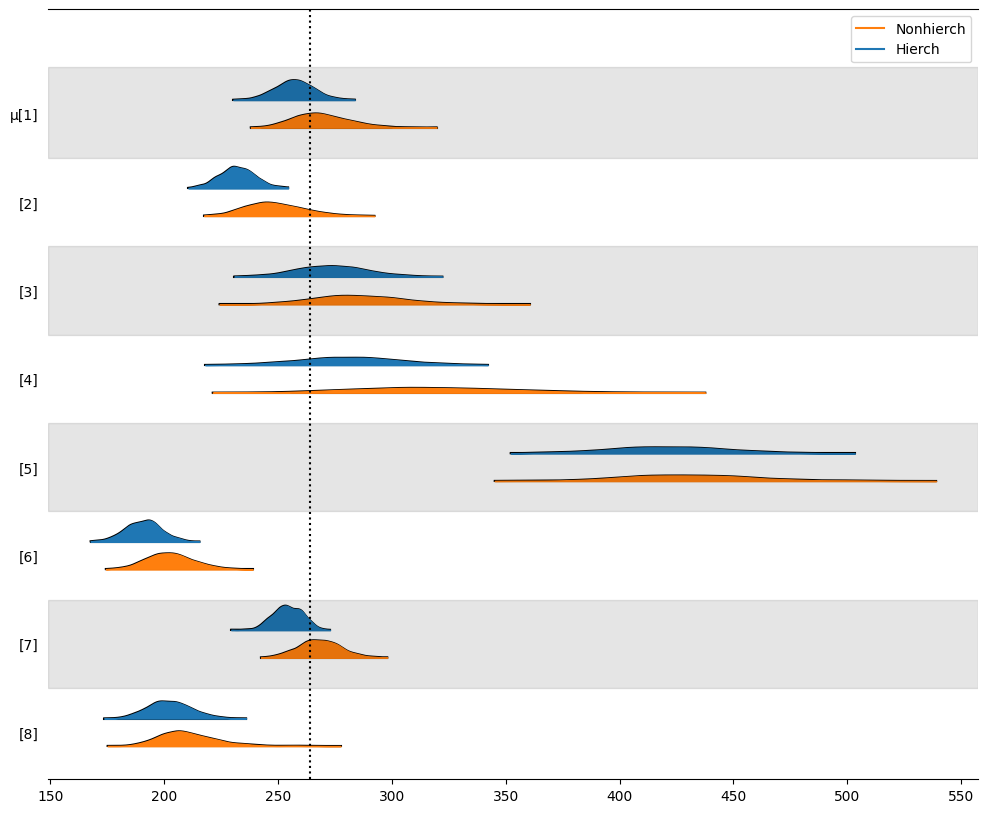

In [ ]:
axes = az.plot_forest([idata_music_hierch_3, idata_music], kind="ridgeplot",
                      model_names=['Hierch', 'Nonhierch'],
                      var_names='μ', combined=True, figsize=(12, 10),hdi_prob=0.997)

y_lims = axes[0].get_ylim()
axes[0].vlines(idata_music_hierch_3.posterior['μ'].mean(), *y_lims, color="k", ls=":");

The mean of my entire data set seems to be around 260 seconds. We can also see the difference in how wide the different genre's distributions are. it's clear that Jazz and Classical music have by far the greatest standard deviation in their song durations, which is pretty predictable as I said earlier. The rest of the Genres are all about the same in terms of standard distribution, but not in mean duration. In mean duration, from shortest to longest, the genres order: Country, Alternative, Pop, Rap, R&B, Rock, Classical, then Jazz.

This order is pretty unofficial because I only took music from one artist per genre, which could greatly affect the average length. I do think though, this order is generally accurate, but the actual distance between means is probably wrong.

I also notice that the hierarchal distributions have much less variance compared to the non hierarchal models. The non hierarchal models also seem to be closer to the mean than the hierarchal models. All in all, my conclusions were pretty predictable and obvious, but thanks for reading anyways.